### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import scipy as sc
from PIL import Image
from skimage import color
from skimage import io
from matplotlib import colors

### 1D functions

In [2]:
# calculates nth Element of kth basis vector
def calc_bkn(N,k,n):
    if k == 0:
        alpha = np.sqrt(1/N)
        return alpha * np.cos(((2*n+1)*k*np.pi)/(2*N))
    alpha = np.sqrt(2/N)
    return alpha * np.cos(((2*n+1)*k*np.pi)/(2*N))

# calculates kth basis vector
def calc_bk(N,k):
    bk = list(range(N))
    for i in range(N):
        bk[i] = calc_bkn(N,k,i)
    return np.array(bk)

# calculates C
def calc_C(N):
    C = np.eye(N)
    for i in range(N):
        for j in range(N):
            C[i,j] = calc_bkn(N,i,j)
    return C
    
# calculates dct of s
def transform(s):
    C = calc_C(len(s))
    return np.matmul(C,s)

# calculates back transformation
def backtransform(t):
    CT = calc_C(len(s)).transpose()
    return np.matmul(CT,t)

# calculates energy of vektor based on parsevals theorem
def parseval(v):
    energy = np.inner(v,v)
    return energy


### 2D functions

In [3]:
# calculates 2D basis img at index (k,l)
def calc_Bkl(N,k,l):
    return np.array(np.outer(calc_bk(N,k), calc_bk(N,l).transpose()))

def dct2D(imgarr):
    N = imgarr.shape[0]
    dct = np.eye(N)
    for i in range(N):
        for j in range(N):
            B_kl = calc_Bkl(N,i,j)
            dct[i,j] = np.sum(B_kl * imgarr)
    return dct

def idct2D(imgarr):
    N = imgarr.shape[0]
    p = np.zeros((N,N))
    for k in range(N):
        for l in range(N):
            p += calc_Bkl(N,k,l) * imgarr[k,l]
    return p
    

def plotheat():
    a = np.random.random((16, 16))
    plt.imshow(a, cmap='hot', interpolation='nearest')
    plt.show()

# not that great...
def plotcos2dwire(N, n, k):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    # Data
    x = np.linspace(0,N,1000)
    y = np.linspace(0,N,1000)
    X, Y = np.meshgrid(x,y)
    Z = np.cos(n*np.pi*(2*X+1)/(2*N)) * np.cos(k*np.pi*(2*Y+1)/(2*N))
    
    # Plot a basic wireframe.
    ax.plot_wireframe(X,Y,Z, rcount = N, ccount = N)
    
    plt.show()

def plotcos2dheat(N,k,l):
    # x, y = np.meshgrid(np.linspace(0,N,N), np.linspace(0,N,N))
    z = calc_Bkl(N,k,l)
    if k == 0 and l == 0:
        plt.imshow(z, cmap='Greys', interpolation='nearest')
    else:
        plt.imshow(z, cmap='Greys_r', interpolation='nearest')
    plt.show()
    return z
    
def readimggray(path):
    img = np.array(Image.open(path).convert('L'))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    return img


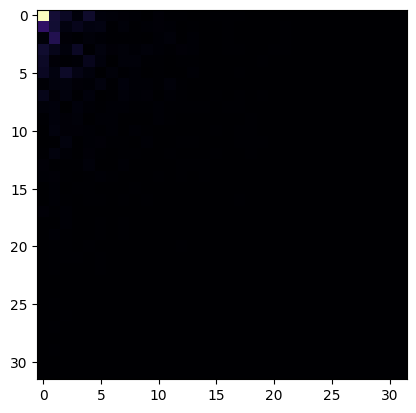

In [34]:
# print(transform(s))
# print(sc.fftpack.dct(s,norm='ortho'))
# s = [1,2,4,7,8,4,3,2]

# z1 = plotcos2dheat(8,6,4)
# z2 = plotcos2dheat(8,6,4)

img = readimggray("test2.png")
# plt.imshow(img, cmap=plt.get_cmap('gray'))
dct = dct2D(img)
matrix = np.absolute(dct)
min_k = np.amin(matrix)
max_k = np.amax(matrix)
plt.imshow(matrix[:32,:32], cmap=plt.get_cmap('magma'))
#plt.imshow(matrix[:32,:32], cmap=plt.get_cmap('magma'), norm=colors.LogNorm())
out = idct2D(dct)
# plt.imshow(out, cmap=plt.get_cmap('gray'))